In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [2]:
cust_prod = pd.read_csv("C:/Users/Kwon/Desktop/crosstab.csv")
del cust_prod["24"]
del cust_prod["83"]
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)
ps = pd.DataFrame(pca_samples)
tocluster = pd.DataFrame(ps[[5, 4]])
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
clusterer = KMeans(n_clusters = 4, random_state = 42).fit(tocluster)
centers =clusterer.cluster_centers_
c_preds =clusterer.predict(tocluster)


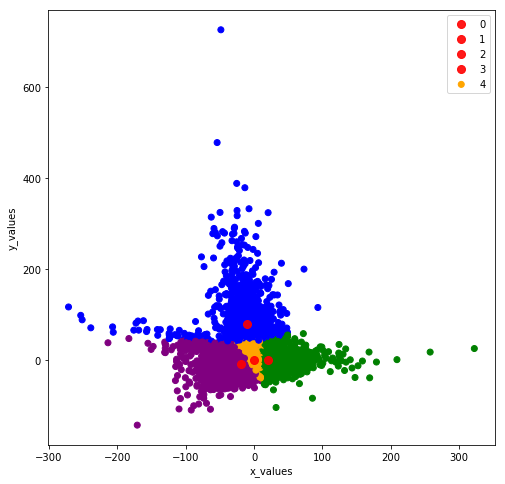

In [5]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
plt.scatter(tocluster[5],tocluster[4], color = colored)
for ci,c in enumerate(centers):
  plt.plot(c[0], c[1], 'o', markersize = 8 , color = 'red',alpha = 0.9, label = ''+str(ci))
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds

